
CS271 Topics in Sequence-based Machine Learning

Spring 2023

Worksheet #3 (B)

### Exploring Word2Vec


## Definition

#For demo purposes we will represent five sentences about kings and queens and compare the wordvec cosine similarities

#Later we will follow the same approach to represent 3 sequences from a taxonomy as a breakdown of their tetramers (kmers with k=4).


In [1]:
#https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
from gensim.models import Word2Vec
# define training data
#For demo purposes we will represent five sentences
#Later we will follow the same approach to represent five sequences from a taxonomy as a breakdown of their tetramers (kmers with k=4).
sentences = [['the', 'king', 'is', 'a', 'man', 'queen', 'is', 'woman'],
			['the', 'king', 'married', 'the', 'queen'],
			['man', 'and', 'woman'],
			['the', 'king', 'is', 'a', 'man'],
			['and', 'the', 'queen', 'is', 'a', 'woman']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['king'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)
print(model['woman'])

Word2Vec(vocab=9, size=100, alpha=0.025)
['the', 'king', 'is', 'a', 'man', 'queen', 'woman', 'married', 'and']
[-4.2443787e-04 -1.9677004e-03 -4.1999561e-03 -2.4671161e-03
 -2.3002934e-03  3.8351300e-03  1.2300048e-03  2.9300966e-03
 -4.5164633e-03  3.9787996e-03 -3.3126569e-03  4.3765856e-03
 -4.2628753e-03  3.4852107e-03  1.2937434e-03 -2.3230580e-03
  1.9319725e-03  3.4529329e-04 -9.0841152e-04  3.0253073e-03
  4.9335076e-03 -2.2658219e-03 -1.6640343e-03 -1.5387163e-03
 -3.6426543e-03 -1.6854035e-03  2.0821602e-03 -1.2922274e-03
  2.8962221e-03 -3.0139578e-03 -2.7609889e-03  4.4365530e-03
 -4.0666051e-03 -2.4145984e-03  4.9439822e-03 -3.1991915e-03
  1.2747084e-03  9.8725851e-04  4.8830565e-03 -3.9065378e-03
 -3.0160844e-03 -4.3632565e-03  9.9878502e-04 -4.8462413e-03
 -8.4735180e-04  4.9475511e-03 -3.7710113e-04  4.5718271e-03
 -3.4814449e-03  3.4454823e-03  4.1616848e-04  4.1142970e-04
 -4.3974540e-04 -5.6864810e-04  1.3791558e-03 -3.8966499e-03
 -3.7635888e-03  3.2108189e-03  6.3

<ipython-input-1-14fa75bede9f>:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['king'])
<ipython-input-1-14fa75bede9f>:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['woman'])


Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct **linguistic contexts** of words. Here lingustic contexts are represented as vector spaces. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. --[Wikipedia](https://en.wikipedia.org/wiki/Word2vec)

## Using the simplified Word2Vec Model

In [2]:
# set up our environment
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

As we said above, in these embedding models each word is represented as a vector. Let's just peek at what kind of words are in our model,

Now, let's do the [classic example](https://www.technologyreview.com/s/541356/king-man-woman-queen-the-marvelous-mathematics-of-computational-linguistics) of 'king - man + woman = queen',

In [3]:
# look up the vectors in our model
#queen = model.loc['queen']
#king = model.loc['king']
#man = model.loc['man']
#woman = model.loc['woman']
queen = model['queen']
king = model['king']
man = model['man']
woman = model['woman']

# compute the vector for 'female king'
female_king = king - man + woman

# now check if 'female king' is more similar to queen than king is
sim = cosine_similarity([female_king,king],[queen])

print("Similarity between 'female king' and 'queen' = {}".format(sim[0,0]))
print("Similarity between 'king' and 'queen' = {}".format(sim[1,0]))

Similarity between 'female king' and 'queen' = 0.02966088056564331
Similarity between 'king' and 'queen' = 0.12178410589694977


<ipython-input-3-49257a804423>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  queen = model['queen']
<ipython-input-3-49257a804423>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  king = model['king']
<ipython-input-3-49257a804423>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  man = model['man']
<ipython-input-3-49257a804423>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  woman = model['woman']


Indeed, 'female king' is more similar to 'queen' than 'king' is.  This clearly shows that these embedding vectors capture some notion of semantics/meaning of the words.

## Visualizing Word Embedding Vectors

In order to visualize the vectors we will take the (potentially very large) dimensional space of the orginal model and project it onto a 2D space using Principle Component Analysis (PCA).  Now each word in our reduced model is represented by a vector in 2D space and therefore we can easily plot those vectors.  One caveat is that we will probably have lost many semantic nuances going from a 300D model to a 2D model but the major semantic concepts are still preserved.

In [4]:
type(model)

gensim.models.word2vec.Word2Vec

<ipython-input-5-9da42cc2b4a9>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors = np.array([model[w] for w in words])


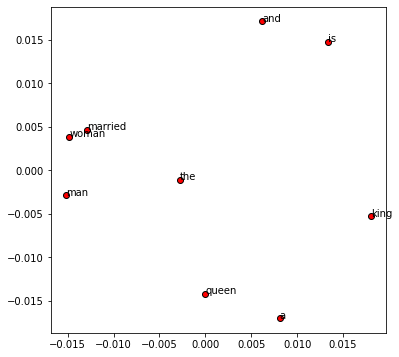

In [5]:
#https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
# https://stackoverflow.com/questions/37190989/how-to-get-vocabulary-word-count-from-gensim-word2vec
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab), sample)
        else:
            words = [ word for word in list(model.wv.vocab) ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x, y, word)



display_pca_scatterplot(model, None, 0)

In [6]:
# reduce our embedding model to 2D
#pca = PCA(n_components=2)
words = [ word for word in list(model.wv.vocab) ]
word_vectors = np.array([model[w] for w in words])

model2D = pd.DataFrame(PCA().fit_transform(word_vectors)[:,:2], index=words)
r,c = model2D.shape
print("Our reduced model has {} words and {} dimensions".format(r,c))

Our reduced model has 9 words and 2 dimensions


<ipython-input-6-fa0a21f074e5>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors = np.array([model[w] for w in words])


Putting our reduced model to work. The picture below shows the words *king* (blue arrow), *queen* (red arrow), *man* (green arrow), and *woman* (black arrow) being embedded in our 2-dimensional vector space representing linguistic contexts.

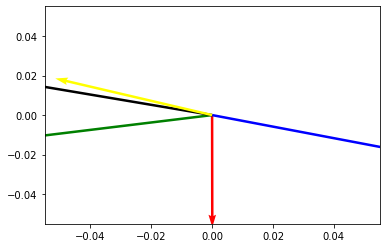

0    0.018003
1   -0.005257
Name: king, dtype: float32

In [7]:
# look up the vectors in our model
queen = model2D.loc['queen']
king = model2D.loc['king']
man = model2D.loc['man']
woman = model2D.loc['woman']
married = model2D.loc['married']

# plot the vectors
plt.quiver(0, 0, queen[0], queen[1], color='red',angles='xy', scale_units='xy', scale=0.25)
plt.quiver(0, 0, king[0], king[1], color='blue',angles='xy', scale_units='xy', scale=0.25)
plt.quiver(0, 0, man[0], man[1], color='green',angles='xy', scale_units='xy', scale=0.25)
plt.quiver(0, 0, woman[0], woman[1], color='black',angles='xy', scale_units='xy', scale=0.25)
plt.quiver(0, 0, married[0], married[1], color='yellow',angles='xy', scale_units='xy', scale=0.25)
plt.show()

queen 

king



Notice that words that typically appear in similar contexts such as king, queen, man, and woman appear close to each other in that space.  Whereas less related concepts such as 'married' are further away. That is precisely the property that word embeddings exploit.  

Now let's redo the classic example 'female_king = king - man + woman' and look at the vectors,

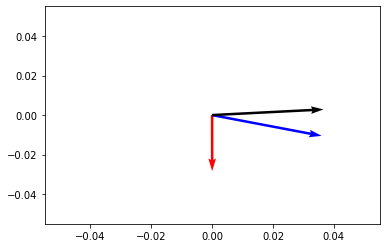

In [8]:
female_king = king - man + woman

plt.quiver(0, 0, queen[0], queen[1], color='red',angles='xy', scale_units='xy', scale=0.5)
plt.quiver(0, 0, king[0], king[1], color='blue',angles='xy', scale_units='xy', scale=0.5)
plt.quiver(0, 0, female_king[0], female_king[1], color='black',angles='xy', scale_units='xy', scale=0.5)
plt.show()

We can see that the black 'female_king' arrow is closer to the red 'queen' arrow than the blue 'king' arrow is to 'queen', as we expected.  But what this visualization also shows is that if we compare 'female_king' to both 'king' and 'queen' we find that it is still more similar to 'king' than to 'queen'.  Something perhaps a bit surprising.  That is not an artifact of the projection of the original 300D space onto our 2D space can be verified by looking at the similarity scores in the original space,

In [9]:
# look up the vectors in our original 300D model
queen = model['queen']
king = model['king']
man = model['man']
woman = model['woman']

# compute the vector for 'female king'
female_king = king - man + woman

# now check the similarity score of 'female king' to 'king' and 'queen'
sim = cosine_similarity([female_king],[king,queen])

print("Similarity between 'female king' and 'king' = {}".format(sim[0,0]))
print("Similarity between 'female_king' and 'queen' = {}".format(sim[0,1]))

Similarity between 'female king' and 'king' = 0.612591028213501
Similarity between 'female_king' and 'queen' = 0.02966088056564331


<ipython-input-9-8349c995ee49>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  queen = model['queen']
<ipython-input-9-8349c995ee49>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  king = model['king']
<ipython-input-9-8349c995ee49>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  man = model['man']
<ipython-input-9-8349c995ee49>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  woman = model['woman']


#Training examples of your own

**Now use the 16S sequences below** from the ncbi taxonomy to create a new word embedding of tetramers (k-mers with k=4). 

Perform the same kind of study for these 3 tetramers: 
CGTA
CTCT
GAGT

Question: which of these are closer in the dataset and which are farther?
Submit the cosine similarity plot you derived.

### Answer
* This answers goes along with the code at the bottom of this codelab. 
* Overall is seems that cgta and gagt seem to be closest due to the following:
	* Graph has cgta (in green) and gagt (in black) as closer.
	* The following are the cosesine similarities of cgta and gagt.
		* At window set to 4 (kmer) 0.8555538654327393.
		* At window set to 5 (kmer) 0.946359395980835.
		* At window set to 6 (kmer) 0.9772980809211731.
* The furthest away (greatest difference) seems to be between cgta and ctct due to the following.
	* Graph has cgta (in green) and ctct(in blue) as furthest.
	* The following are the cosesine similarities of cgta and gagt.
		* At window set to 4 (kmer) 0.8090918660163879.
		* At window set to 5 (kmer) 0.9167221188545227.
		* At window set to 6 (kmer) 0.9629348516464233.


In [10]:
#https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
##https://radimrehurek.com/gensim/models/word2vec.html

def getKmers(sequence, sizek):
    return [sequence[x:x+sizek].lower() for x in range(len(sequence) - sizek + 1)]

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

paenibacillus_16s_sequence = """GACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGGACTTGATGGAGAGCTTGCTCTCCTGATG
GTTAGCGGCGGACGGGTGAGTAACACGTAGGTAACCTGCCTGTAAGACTGGGATAACTACCGGAAACGGT
AGCTAATACCGGATAATTCATTTTACTGCATGGTGGAGTGATGAAAGACGGAGCAATCTGTCACTTACGG
ATGGGCCTGCGGCGCATTAGCTAGTTGGTGGGGTAACGGCCCACCAAGGCGACGATGCGTAGCCGACCTG
AGAGGGTGAACGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTAGGGAATCT
TCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAGTGATGAAGGTTTTCGGATCGTAAAGCTCT
GTTGCCAGGGAAGAACGTCCGGTAGAGTAACTGCTACCGGAGTGACGGTACCTGAGAAGAAAGCCCCGGC
TAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCG
CGCGCAGGCGGTTATTTAAGTCTGGTGTTTAATCCTGGGGCTCAACCCCGGGTCGCACCGGAAACTGGGT
AACTTGAGTACAGAAGAGGAGAGTGGAATTCCACGTGTAGCGGTGAAATGCGTAGATATGTGGAGGAACA
CCAGTGGCGAAGGCGACTCTCTGGGCTGTAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAGGAT
TAGATACCCTGGTAGTCCACGCCGTAAACGATGAATGCTAGGTGTTAGGGGTTTCGATACCCTTGGTGCC
GAAGTTAACACATTAAGCATTCCGCCTGGGGAGTACGGTCGCAAGACTGAAACTCAAAGGAATTGACGGG
GACCCGCACAAGCAGTGGAGTATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAAGTCTTGACAT
CCCAATGAAAACACCAGAGATGGTGTCCCTCTTCGGAGCATTGGTGACAGGTGGTGCATGGTTGTCGTCA
GCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTGATTTTAGTTGCCAGCACTTT
GGGTGGGCACTCTAGAATGACTGCCGGTGACAAACCGGAGGAAGGCGGGGATGACGTCAAATCATCATGC
CCCTTATGACTTGGGCTACACACGTACTACAATGGCCGGTACAACGGGAAGCGAAGCCGCGAGGTGGAGC
GAATCCTAGAAAAGCCGGTCTCAGTTCGGATTGCAGGCTGCAACTCGCCTGCATGAAGTCGGAATTGCTA
GTAATCGCGGATCAGCATGCCGCGGTGAATACGTTCCCGGGTCTTGTACACACCGCCCGTCACACCACGA
GAGTTTACAACACCCGAAGTCGGTGAGGTAACCGCAAGGAGCCAGCCGCCGAAGGTGGGGTAGATGATTG
GGGTG""".replace("\n", "")
paenibacillus_16s_sequence = getKmers(paenibacillus_16s_sequence, sizek=4)

#from https://www.ncbi.nlm.nih.gov/nuccore
bacillus_16s_sequence = """AGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGGATGAAGAG
GAGCTTGCTCCTTGGATTCAGCGGCGGACGGGTGAGTAACACGTGGGCAACCTGCCTGTAAGACTGGGAT
AACTCCGGGAAACCGGGGCTAATACCGGATAACTTCTTTTCTCGCATGGGAAGAGGTTGAAAGACGGTTT
TGCTGTCACTTACAGATGGGCCCGCGGCGCATTAGCTAGTTGGTGGGGTAACGGCCTACCAAGGCGACGA
TGCGTAGCCGACCTGAGAGGGTGATCGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGC
AGCAGTAGGGAATCTTCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAGTGACGAAGGCCTTC
GGGTCGTAAAACTCTGTTATCAGGGAAGAACAAGCATCATTTAACTGATGGTGCCTTGACGGTACCTGAC
CAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGAATTA
TTGGGCGTAAAGCGCGCGCAGGCGGCTTCTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGT
CATTGGAAACTGGGAGGCTTGAGTGCAGAAGAGAAGAGCGGAATTCCACGTGTAGCGGTGAAATGCGTAG
AGATGTGGAGGAACACCAGTGGCGAAGGCGGCTCTTTGGTCTGTAACTGACGCTGAGGCGCGAAAGCGTG
GGGAGAGAACAGGATTAGATACCCTGGTATTCCACGCCGTAAACGATGAGTGCTAAGTGTTAGGGGGTTT
CCGCCCCTTAGTGCTGCAGCAAACGCATTAAGCACTCCGCCTGGGGAGTACGGCCGCAAGGCTGAAACTC
AAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTT
ACCAGGTCTTGACATCCCGCTGACCGGTGCAGAGATGTGCCTTTCCCTTCGGGGACAGCGGTGACAGGTG
GTGCATGGTTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTGATC
TTAGTTGCCAGCATTTAGTTGGGCACTCTAAGGTGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGA
CGTCAAATCATCATGCCCCTTATGACCTGGGCTACACACGTGCTACAATGGATGGTACAGAGGGCAGCGA
GACCGCGAGGTTCAGCGAATCCCTTAAAACCATTCTCAGTTCGGATTGCAGGCTGCAACTCGCCTGCATG
AAGCCGGAATCGCTAGTAATCGCGGATCAGCATGCCGCGGTGAATACGTTCCCGGGCCTTGTACACACCG
CCCGTCACACCACGAGAGTTTGTAACACCCGAAGTCGGTGGGGTAACCCTTCTGGGAGCCAGCCGCCGAA
GGTGGGACAGATGATTGGGGTGAAGTCGTAACAAGGTAGCCGTA""".replace("\n", "")
bacillus_16s_sequence = getKmers(bacillus_16s_sequence, sizek=4)

paracoccus_16s_sequence = """CTGGCTCAGAACGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGAGATCTTCGGGTCTAGCGGC
GGACGGGTGAGTAACGCGTGGGAATATGCCTCTTGGTACGGAATAGCCTCGGGAAACTGGGAGTAATGCC
GTATGTGCCCTTTGGGGGAAAGATTTATCGCCAAGAGATTAGCCCGCGTTGGATTAGGTAGTTGGTGGGG
TAATGGCCTACCAAGCCTACGATCCATAGCTGGTTTGAGAGGATGATCAGCCACACTGGGACTGAGACAC
GGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATCTTAGACAATGGGGGAAACCCTGATCTAGCCATGC
CGCGTGAGTGATGAAGGCCTTAGGGTTGTAAAGCTCTTTCAGCTGGGAAGATAATGACGGTACCAGCAGA
AGAAGCCCCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGGGCTAGCGTTGTTCGGAATTACT
GGGCGTAAAGCGCACGTAGGCTGATCGGAAAGTTGGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCC
TTCAAAACTATCGGTCTTGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGAT
ATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGCGTGGG
GAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAATGCCAGACGTCGGGCAGCATGC
TGTTCGGTGTCACACCTAACGGATTAAGCATTCCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAAG
GAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGCAGAACCTTACCA
ACCCTTGACATCCCCGGACCGCTGGAGAGATCCAGTTTCCTCGTAAGAGGCCGGGAGACAGGTGCTGCAT
GGCTGTCGTCAGCTCGTGTCGTGAGATGTTCGGTTAAGTCCGGCAACGAGCGCAACCCACGTCCTTAGTT
GCCAGCATTCAGTTGGGCACTCTAGGGAAACTGCCGATGATAAGTCGGAGGAAGGTGTGGATGACGTCAA
GTCCTCATGGCCCTTACGGGTTGGGCTACACACGTGCTACAATGGTGGTGACAGAGGGTTAATCCCTAAA
AGCCATCTCAGTTCGGATTGGGGTCTGCAACTCGACCCCATGAAGTTGGAATCGCTAGTAATCGCGTAAC
AGCATGACGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTTGGGTCTAC
CCGACGGCCGTGCGCCAACCAGCAATGGGGGCAGCGGACCACGGTAGGCTCAGCGACTGGGGTGAAGTCG
TA""".replace("\n", "")
paracoccus_16s_sequence = getKmers(paracoccus_16s_sequence, sizek=4)

###print(str(common_texts))
###texts = [["ACGT", "TTGG", "CGCG"], ["AAAA", "AAAC", "AAAG"], ["TTTT", "TTGG", "TTCC"]]
texts = [paenibacillus_16s_sequence, bacillus_16s_sequence, paracoccus_16s_sequence]
model = Word2Vec(sentences=texts, window=2, min_count=1, workers=4)

#If you save the model you can continue training it later:
#model.save("word2vec.model")
#model = Word2Vec.load("word2vec.model")
#model.train([["ACGT", "TTGG", "CGCG"], ["AAAA", "AAAC", "AAAG"], ["TTTT", "TTGG", "TTCC"]], total_examples=30, epochs=10)


vector = model["cgta"]  # get numpy vector of a word

print(vector)

from gensim.models import KeyedVectors

# Store just the words + their trained embeddings.
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

#vector = wv['CGTA']  # Get numpy vector of a word
print(wv)


[ 0.00918634 -0.0078407   0.00010674  0.00047906  0.00371299  0.0001442
  0.00627904  0.00575571  0.00375887 -0.00199436  0.00324967  0.00126801
  0.00490205 -0.00425195  0.00185265  0.00160402 -0.00135863 -0.00153603
  0.00220093  0.00699439 -0.00286925  0.00100776 -0.00336423  0.00303104
  0.00208871  0.00538042 -0.00313441 -0.00112236  0.00501356 -0.0064277
 -0.00511448 -0.00176362  0.00543827 -0.00263437 -0.00611351  0.00382785
  0.00525984 -0.00340806 -0.0021509   0.00927751 -0.0034665   0.00020951
 -0.0013853   0.00109455  0.00339519  0.00368702  0.00109603  0.00202712
 -0.00024248 -0.00221513  0.00504241 -0.00480153  0.00563703  0.00575923
 -0.00147988 -0.005162    0.00361658  0.00190159 -0.00273433 -0.000416
  0.00168226  0.00657981 -0.00236187 -0.00167321 -0.00124189 -0.00411557
 -0.01133568 -0.0032582   0.00060222 -0.00427752 -0.00334882  0.00417132
  0.00241627  0.00023984  0.00318713 -0.00345438 -0.00022283  0.00278026
  0.00160297 -0.00139478  0.00413163  0.00759204  0.005

<ipython-input-10-5e4d8afb460c>:93: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = model["cgta"]  # get numpy vector of a word



---




<ipython-input-19-88f4522aed21>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  cgta = model4k['cgta']
<ipython-input-19-88f4522aed21>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  ctct = model4k['ctct']
<ipython-input-19-88f4522aed21>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  gagt = model4k['gagt']
<ipython-input-19-88f4522aed21>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  cgta = model5k['cgta']
<ipython-input-19-88f4522aed21>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  ctct = model5k['ctct']
<ipython-input-19-88f4522aed21>:15: DeprecationWarning: Call to deprecated `__getit

Cosine similarity score when k=4
Similarity between 'cgta' and 'ctct' = 0.8090918660163879
Similarity between 'cgta' and 'gagt' = 0.8555538654327393
Similarity between 'ctct' and 'gagt' = 0.8273328542709351
Cosine similarity score when k=5
Similarity between 'cgta' and 'ctct' = 0.9167221188545227
Similarity between 'cgta' and 'gagt' = 0.946359395980835
Similarity between 'ctct' and 'gagt' = 0.9284485578536987
Cosine similarity score when k=6
Similarity between 'cgta' and 'ctct' = 0.9629348516464233
Similarity between 'cgta' and 'gagt' = 0.9772980809211731
Similarity between 'ctct' and 'gagt' = 0.9668830037117004


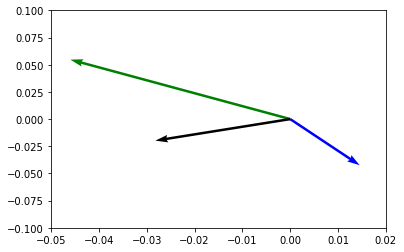

In [19]:
# trainging models with different numbers for k (for the kmer).
model4k = Word2Vec(sentences=texts, window=4, min_count=1, workers=4)
model5k = Word2Vec(sentences=texts, window=5, min_count=1, workers=4)
model6k = Word2Vec(sentences=texts, window=6, min_count=1, workers=4)
# Cosine similarty number.
cgta = model4k['cgta']
ctct = model4k['ctct']
gagt = model4k['gagt']
print("Cosine similarity score when k=4")
print("Similarity between 'cgta' and 'ctct' = {}".format(cosine_similarity([cgta],[ctct])[0,0]))
print("Similarity between 'cgta' and 'gagt' = {}".format(cosine_similarity([cgta],[gagt])[0,0]))
print("Similarity between 'ctct' and 'gagt' = {}".format(cosine_similarity([ctct],[gagt])[0,0]))
cgta = model5k['cgta']
ctct = model5k['ctct']
gagt = model5k['gagt']
print("Cosine similarity score when k=5")
print("Similarity between 'cgta' and 'ctct' = {}".format(cosine_similarity([cgta],[ctct])[0,0]))
print("Similarity between 'cgta' and 'gagt' = {}".format(cosine_similarity([cgta],[gagt])[0,0]))
print("Similarity between 'ctct' and 'gagt' = {}".format(cosine_similarity([ctct],[gagt])[0,0]))
cgta = model6k['cgta']
ctct = model6k['ctct']
gagt = model6k['gagt']
print("Cosine similarity score when k=6")
print("Similarity between 'cgta' and 'ctct' = {}".format(cosine_similarity([cgta],[ctct])[0,0]))
print("Similarity between 'cgta' and 'gagt' = {}".format(cosine_similarity([cgta],[gagt])[0,0]))
print("Similarity between 'ctct' and 'gagt' = {}".format(cosine_similarity([ctct],[gagt])[0,0]))
# Question: which of these are closer in the dataset and which are farther? Submit the cosine similarity plot you derived.
# PCA 
words = [ word for word in list(model4k.wv.vocab) ]
word_vectors = np.array([model4k[w] for w in words])
model2D = pd.DataFrame(PCA().fit_transform(word_vectors)[:,:2], index=words)

# Getting vectors. Look up the vectors in our model.
cgta = model2D.loc['cgta']
ctct = model2D.loc['ctct']
gagt = model2D.loc['gagt']

# Cosine similarity plot.
plt.quiver(0, 0, cgta[0], cgta[1], color='green', angles='xy', scale_units='xy', scale=0.1)
plt.quiver(0, 0, ctct[0], ctct[1], color='blue',angles='xy', scale_units='xy', scale=0.1)
plt.quiver(0, 0, gagt[0], gagt[1], color='black',angles='xy', scale_units='xy', scale=0.1)
plt.xlim(-0.05, 0.02)
plt.ylim(-0.1, 0.1)
plt.show()